In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading dataframe from csv dataset
df = pd.read_csv('toy_dataset.csv')

In [3]:
df.head(10)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
5,6,Dallas,Female,36,50786.0,No
6,7,Dallas,Female,32,33155.0,No
7,8,Dallas,Male,39,30914.0,No
8,9,Dallas,Male,51,68667.0,No
9,10,Dallas,Female,30,50082.0,No


In [4]:
#creating contingency table for the variables city and gender
contingency_table = pd.crosstab(df.City, df.Gender)
contingency_table

Gender,Female,Male
City,,
Austin,5385,6907
Boston,3715,4586
Dallas,8705,11002
Los Angeles,14285,17888
Mountain View,6276,7943
New York City,22172,28135
San Diego,2098,2783
Washington D.C.,3564,4556


In [5]:
#formula to convert contingency table into marginal proportions
marginal_proportions = (contingency_table/len(df))*100
marginal_proportions

Gender,Female,Male
City,,
Austin,3.590000,4.604667
Boston,2.476667,3.057333
Dallas,5.803333,7.334667
Los Angeles,9.523333,11.925333
Mountain View,4.184000,5.295333
New York City,14.781333,18.756667
San Diego,1.398667,1.855333
Washington D.C.,2.376000,3.037333


In [6]:
#seperating age into a separate series
male_age = df.Age[df.Gender == 'Male']
female_age = df.Age[df.Gender == 'Female']

#calculate means for each group:
male_age_mean = np.mean(male_age)
female_age_mean = np.mean(female_age)

#calculating the difference in mean for both genders
mean_diff = male_age_mean - female_age_mean

#print mean difference
print(f'Mean difference: {mean_diff}')

Mean difference: -0.08513905212382156


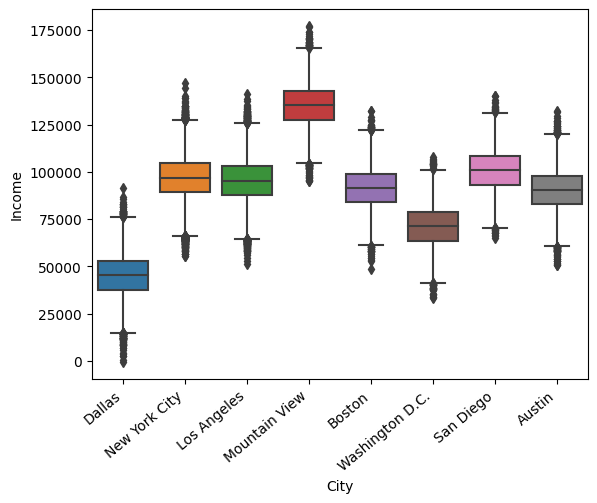

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting box plot for the variables city and income
ax = sns.boxplot(data = df, x = df['City'], y = df['Income'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

In [8]:
import numpy as np

#finding correlation between the variables age and income
corr_age_income = df.Age.corr(df.Income)

print(f'The correlation coefficient value is {corr_age_income}')
#Note that the default correlation coefficient formula taken into consideration is pearson coefficient in the pandas correlation function

The correlation coefficient value is -0.0013181143630648132


<AxesSubplot: xlabel='Income', ylabel='Age'>

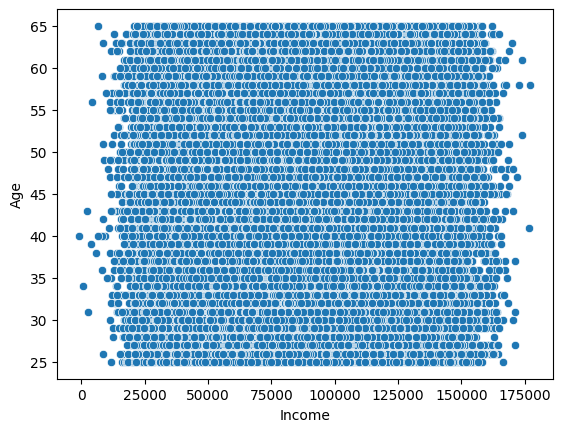

In [9]:
#plotting scatterplot between the numerical variables income and age
sns.scatterplot(data=df, x = df.Income, y = df.Age)

In [10]:
df_house = pd.read_csv('housing.csv')

In [11]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
df_house.ocean_proximity.value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
df_house.ocean_proximity.value_counts()

df_house_1hocean = df_house[df_house.ocean_proximity == 'NEAR OCEAN']
df_house_inland = df_house[df_house.ocean_proximity == 'NEAR BAY']

In [14]:
df_house['median_house_value'].mean()

206855.81690891474

In [15]:
from scipy.stats import ttest_1samp
import numpy as np

#applying the function for one sample t test to obtain p value
tstat, pval = ttest_1samp(df_house.median_house_value, 786700)
print(f'the resulting p-value for the one sample t-test is {pval}')


the resulting p-value for the one sample t-test is 0.0


In [16]:
df_house_1hocean = df_house[df_house.ocean_proximity == 'NEAR OCEAN']
df_house_inland = df_house[df_house.ocean_proximity == 'NEAR BAY']

from scipy.stats import ttest_ind
import numpy as np

#applying two sample t test function
tstat, pval = ttest_ind(df_house_1hocean.median_house_value, df_house_inland.median_house_value)
print(f'the resulting p-value for the two sample t-test is {pval}')

the resulting p-value for the two sample t-test is 0.00518433462827199


In [17]:
contingency = pd.crosstab(df.City, df.Gender)

In [18]:
from scipy.stats import chi2_contingency

#creating contingency table for the variables city and gender
contingency_table = pd.crosstab(df.City, df.Gender)

#applying chi square function to obtain p value by passing contingency table to the function
res = chi2_contingency(contingency_table)
print(f'the resulting p-value for the chi square test is {res.pvalue}')

the resulting p-value for the chi square test is 0.5812220214510175
